<a href="https://colab.research.google.com/github/Mjcherono/Predicting-Disease-Spread/blob/main/dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DengAI: Predicting Disease Spread(Dengue)



### Problem Description
In cities where dengue is present, the disease is endemic. Globally, researchers estimate that dengue infects 390 million people per year ; however, only 50–100 million cases are detected due to the high asymptomatic rate . Estimating dengue burden can be problematic due to delays in case identification, strong intra- and inter-annual variation in incidence, and the majority of cases being clinically mild or asymptomatic . As a result, implementing effective vector control operations can be challenging. To overcome these issues, the development of accurate and timely early warnings systems capable of predicting future dengue incidence needs to be done.


### Determining Success Metrics.
For this project to be termed successful, if any of the models built achieve an accuracy of above 80% in prediction of total dengue cases.


### Experimental Design
*   Importing Libraries.
*   Loading dataset.
*   Data Cleaning and Preprocessing.
*   Exploratory data analysis.
*   Model Implementation.
*   Acccuracy check.





##### Libraries

In [241]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

##### Loading data.

In [242]:
#train

train=pd.read_csv("/content/dengue_features_train (1).csv")

In [243]:
#preview of the head

train.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [244]:
#shape

train.shape

(1456, 24)

In [245]:
#Test data

test=pd.read_csv("/content/dengue_features_test (1).csv")

In [246]:
# preview of head

test.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [247]:
#shape

test.shape

(416, 24)

In [248]:
#labels

labels=pd.read_csv("/content/dengue_labels_train.csv")

In [249]:
labels.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [250]:
labels.shape

(1456, 4)

###### Merging datasets


In [251]:
trainmerge=train.merge(labels,on=["city","year","weekofyear"],how="right")
trainmerge.shape


(1456, 25)

In [252]:
trainmerge.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


Description of Dataset.


In [253]:
trainmerge.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [254]:
#summary of the combined set

trainmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

the merged dataset has 1456 observations and 25 columns,2 objects, 3 integer values and 20 float columns.

In [255]:
#Checking on target variable

trainmerge.total_cases.value_counts()

0      100
6       71
3       70
5       70
2       69
      ... 
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

Changing week start date to date time.

In [256]:
trainmerge.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [257]:
trainmerge['week_start_date']=pd.to_datetime(trainmerge['week_start_date'],
                                             format='%Y/%m/%d')
trainmerge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

###### Separating entries based on cities.

In [258]:
# create new datasets
sj = trainmerge[trainmerge['city'] == 'sj']
iq = trainmerge[trainmerge['city'] == 'iq']

In [259]:
sj.shape

(936, 25)

In [260]:
iq.shape

(520, 25)

###### Checking for null values

In [261]:
#San Juan data
sj.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [262]:
#Geting the percentage of missing data

sj.isnull().sum()/len(sj)*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  20.405983
ndvi_nw                                   5.235043
ndvi_se                                   2.029915
ndvi_sw                                   2.029915
precipitation_amt_mm                      0.961538
reanalysis_air_temp_k                     0.641026
reanalysis_avg_temp_k                     0.641026
reanalysis_dew_point_temp_k               0.641026
reanalysis_max_air_temp_k                 0.641026
reanalysis_min_air_temp_k                 0.641026
reanalysis_precip_amt_kg_per_m2           0.641026
reanalysis_relative_humidity_percent      0.641026
reanalysis_sat_precip_amt_mm              0.961538
reanalysis_specific_humidity_g_per_kg     0.641026
reanalysis_tdtr_k                         0.641026
station_avg_temp_c             

We wont drop any columns since it's within the threshhold.

###### Imputing missing data


In [263]:
#Imputing using forward fill.

sj.fillna(method='pad',inplace=True)
sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [264]:
#Iquitos data

iq.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

In [265]:
#checking on percentages 
iq.isnull().sum()/len(iq)*100

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  0.576923
ndvi_nw                                  0.576923
ndvi_se                                  0.576923
ndvi_sw                                  0.576923
precipitation_amt_mm                     0.769231
reanalysis_air_temp_k                    0.769231
reanalysis_avg_temp_k                    0.769231
reanalysis_dew_point_temp_k              0.769231
reanalysis_max_air_temp_k                0.769231
reanalysis_min_air_temp_k                0.769231
reanalysis_precip_amt_kg_per_m2          0.769231
reanalysis_relative_humidity_percent     0.769231
reanalysis_sat_precip_amt_mm             0.769231
reanalysis_specific_humidity_g_per_kg    0.769231
reanalysis_tdtr_k                        0.769231
station_avg_temp_c                       7.115385


Equally no dropping of columns they are all below 20%

Filling missing values in Iquitos data.

In [266]:
#Imputed for missing values using forward fill method.

iq.fillna(method='pad', inplace=True)
iq.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

###### Duplicated Values


In [267]:
#duplicated on Iquitos

iq.duplicated().sum()

0

In [268]:
#duplicated on san juan

sj.duplicated().sum()

0

In [269]:
sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


###### Outliers

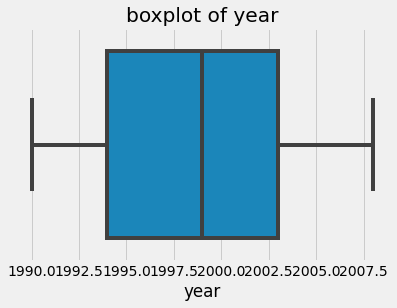

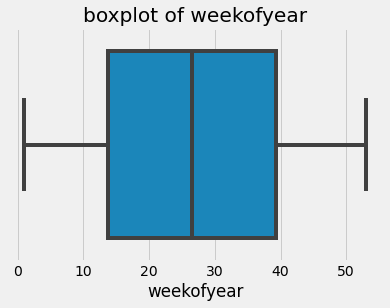

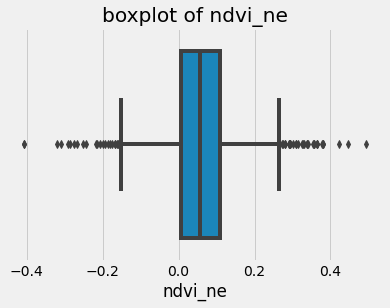

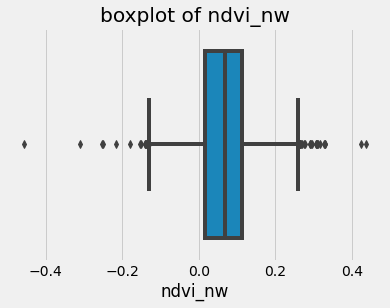

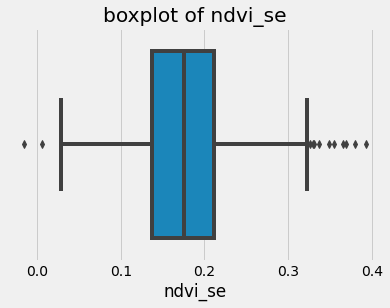

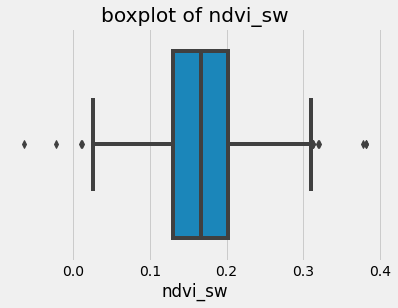

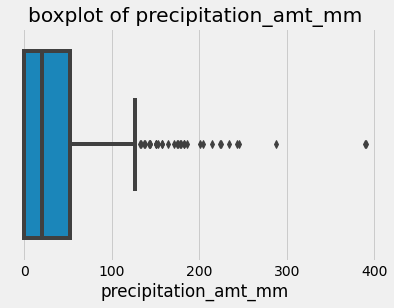

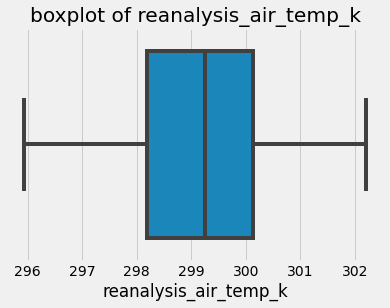

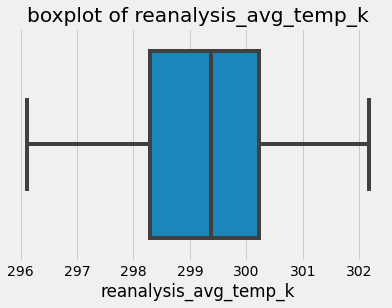

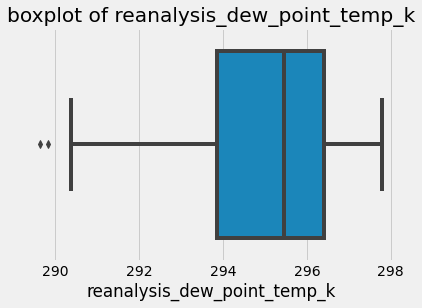

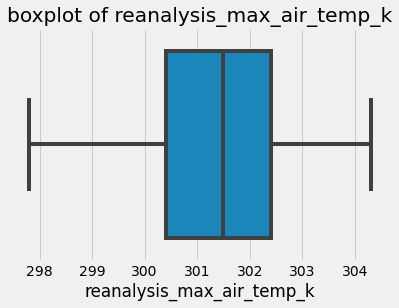

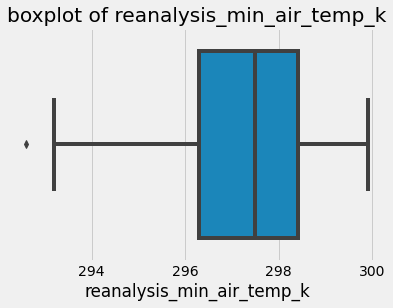

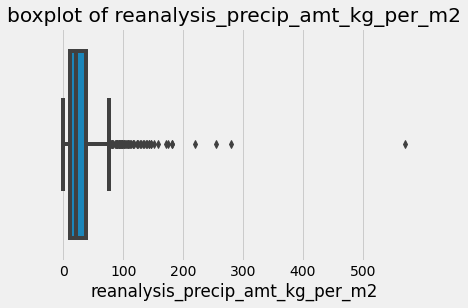

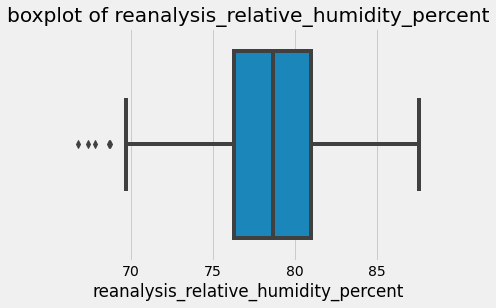

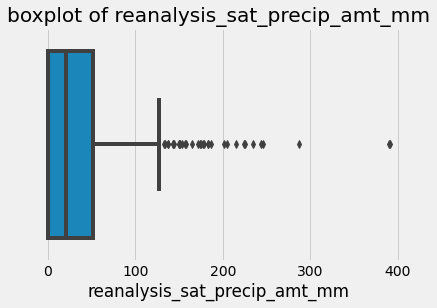

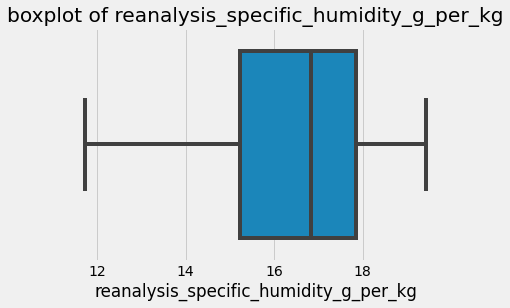

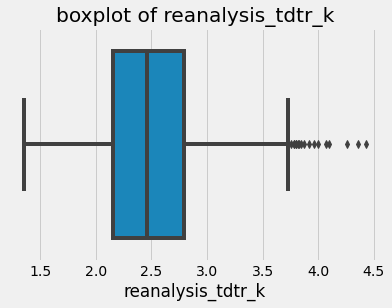

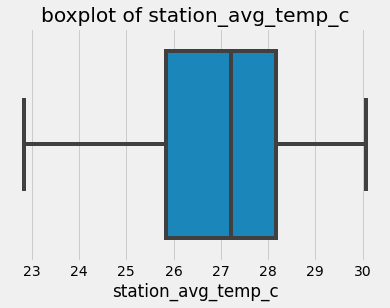

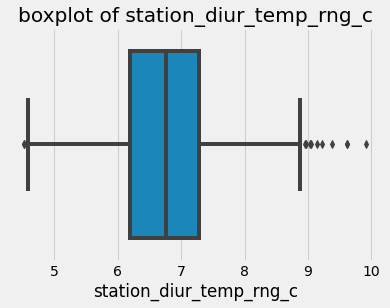

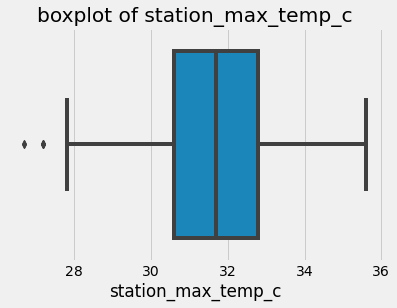

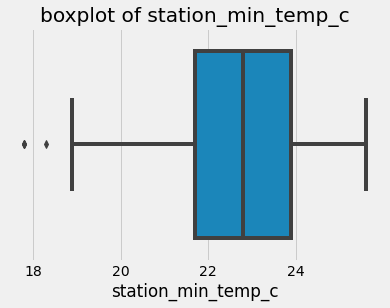

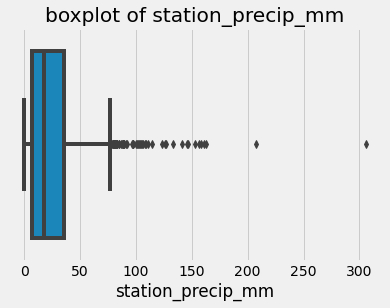

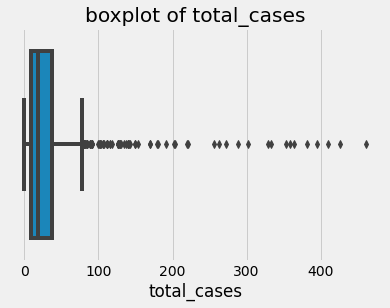

In [270]:
#Numeric features
sj_num = sj.drop(['city','week_start_date'],axis=1)

colnames = list(sj_num.columns)
for i in colnames:
    plt.title(f'boxplot of {i}')
    sns.boxplot(sj_num[i])
    plt.show()



*   The outliers on NDVI columns won't be gotten rid of since they indicate areas with extreme cases in terms of vegetation cover. That at 0 and below corresponds to barren areas of rock or sand/ snow .Moderate values where the interquatile range is at represents shrubs and grasslands while high values represent temperature and tropical rainforests.
*   List item



Description of data


In [271]:
print(sj.describe())
print(iq.describe())

              year  weekofyear  ...  station_precip_mm  total_cases
count   936.000000  936.000000  ...         936.000000   936.000000
mean   1998.826923   26.503205  ...          26.756838    34.180556
std       5.212076   15.021909  ...          29.264050    51.381372
min    1990.000000    1.000000  ...           0.000000     0.000000
25%    1994.000000   13.750000  ...           6.875000     9.000000
50%    1999.000000   26.500000  ...          17.650000    19.000000
75%    2003.000000   39.250000  ...          35.350000    37.000000
max    2008.000000   53.000000  ...         305.900000   461.000000

[8 rows x 23 columns]
              year  weekofyear  ...  station_precip_mm  total_cases
count   520.000000  520.000000  ...         520.000000   520.000000
mean   2005.000000   26.503846  ...          61.581346     7.565385
std       2.918283   15.029450  ...          62.968520    10.765478
min    2000.000000    1.000000  ...           0.000000     0.000000
25%    2002.750000   13.7

### Exploratory Data Analysis.

#### Univariate Analysis.
San Juan,Puerto Rico.

In [272]:
# Getting min and max value of week start dates
sj['week_start_date'].min(),sj['week_start_date'].max()

(Timestamp('1990-04-30 00:00:00'), Timestamp('2008-04-22 00:00:00'))

0
461


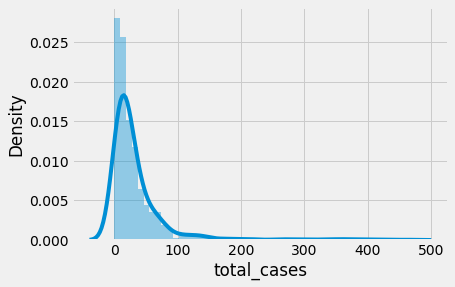

In [273]:
# getting min value of total cases
print(sj['total_cases'].min())

# getting max value of total cases
print(sj['total_cases'].max())

#Plotting the distribution of total cases
sns.distplot(sj.total_cases)
plt.show()

In [274]:
# Checking on  min value of weekof year
print(sj['weekofyear'].min())

1


In [275]:
# checking  min and max value of week start dates 
sj['weekofyear'].max()

53

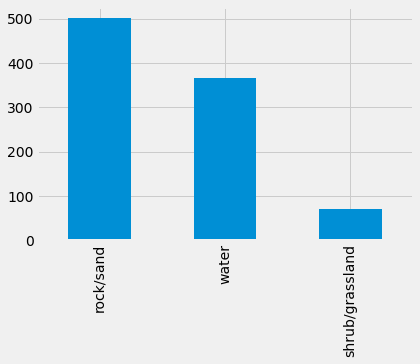

In [276]:
sj['ndvi_all_directions']=(sj['ndvi_ne']+sj['ndvi_nw']+sj['ndvi_se']+sj['ndvi_sw'])/4

# 
def get_ndvi_category(x):
    x=float(x)
    if x < 0.1: return 'water'
    if x >= 0.1 and x <0.2: return 'rock/sand'
    if x >=0.2 and x<0.5 : return 'shrub/grassland'
    if x > 0.6: return 'forest'
    return "other"

sj['ndvi_desc'] = sj.ndvi_all_directions.apply(get_ndvi_category)  

sj['ndvi_desc'].value_counts().plot(kind='bar')

Most parts of this city are rocky.

#### Bivariate Analysis.

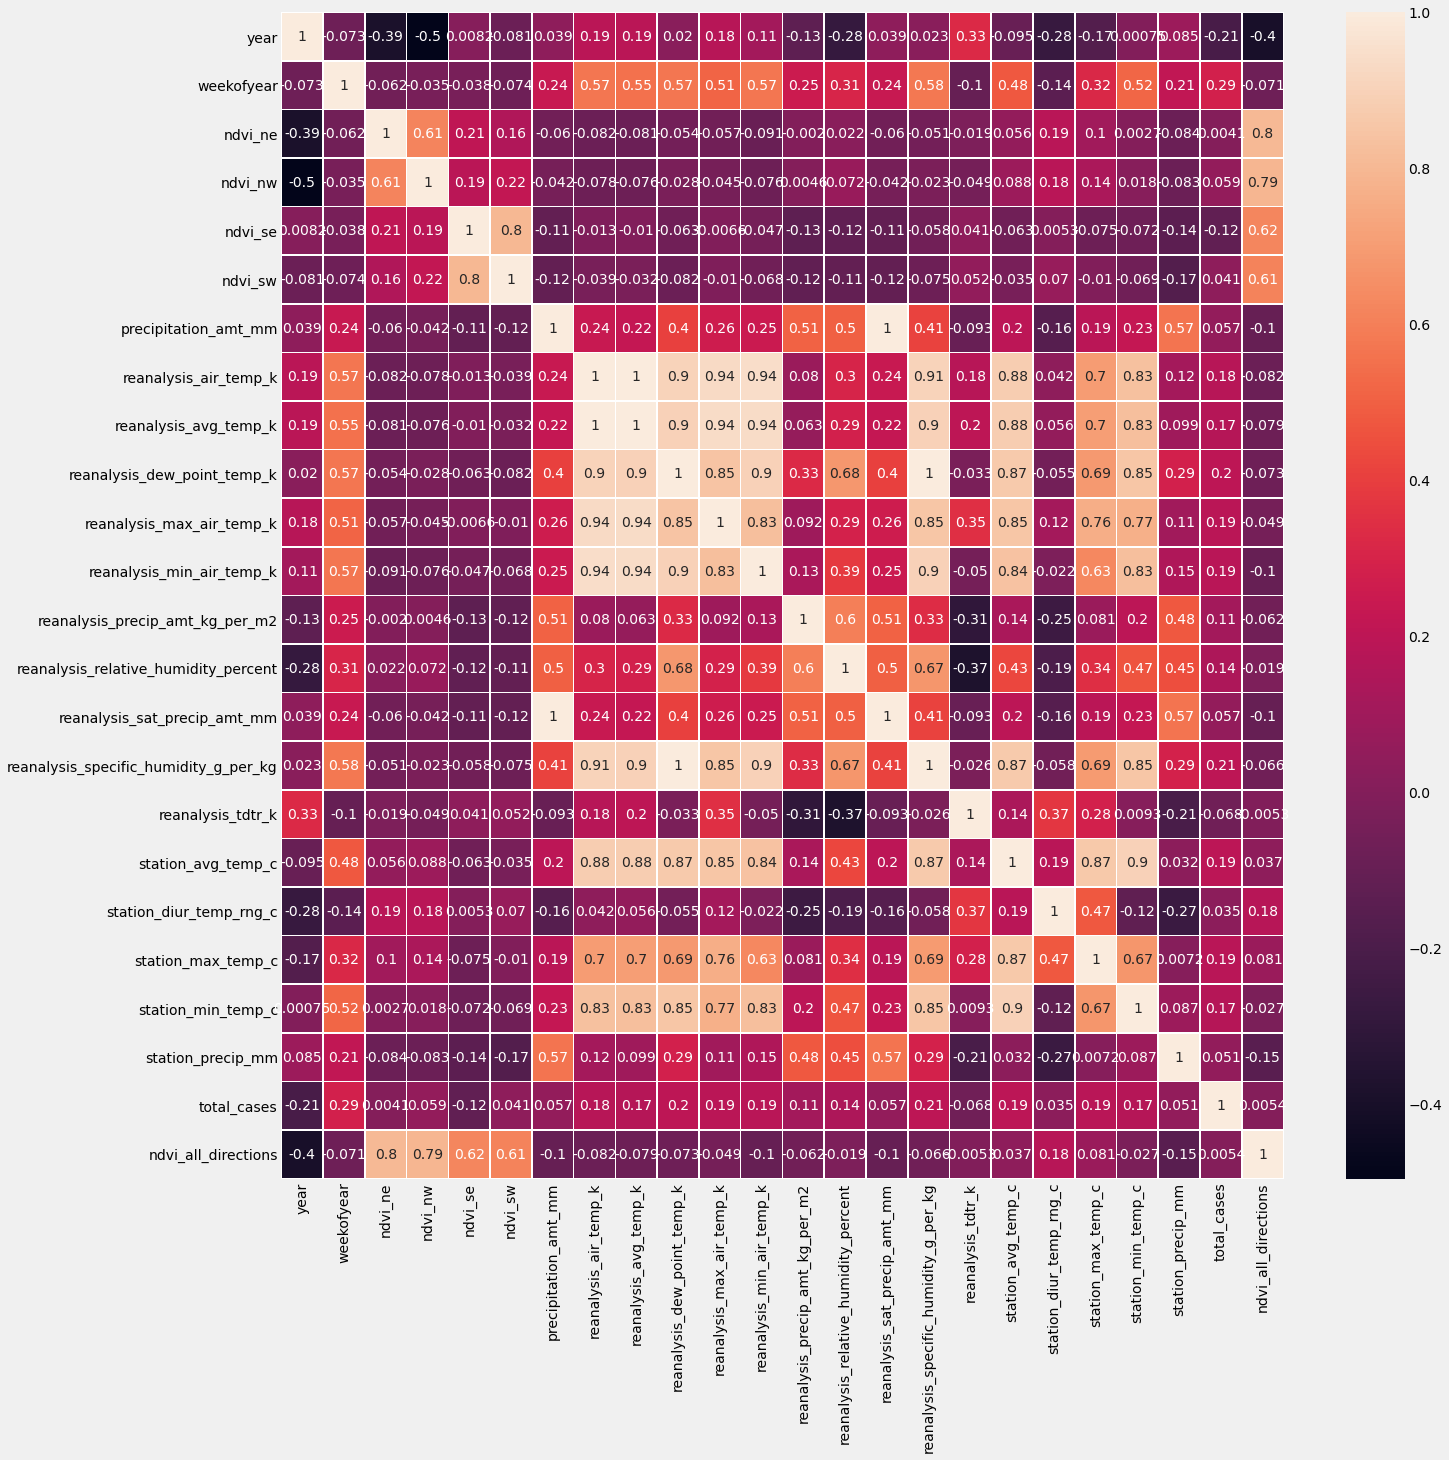

In [277]:
# San Juan
data_corr = sj.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data_corr,annot=True,linewidths=.6, ax=ax)





*  Apparently total number of dengue cases has no correlation with any feature.
Temperature: The temperature variables (reanalysis_air_temp_k to reanalysis_min_air_temp_k) are strongly correlated together in San Juan.





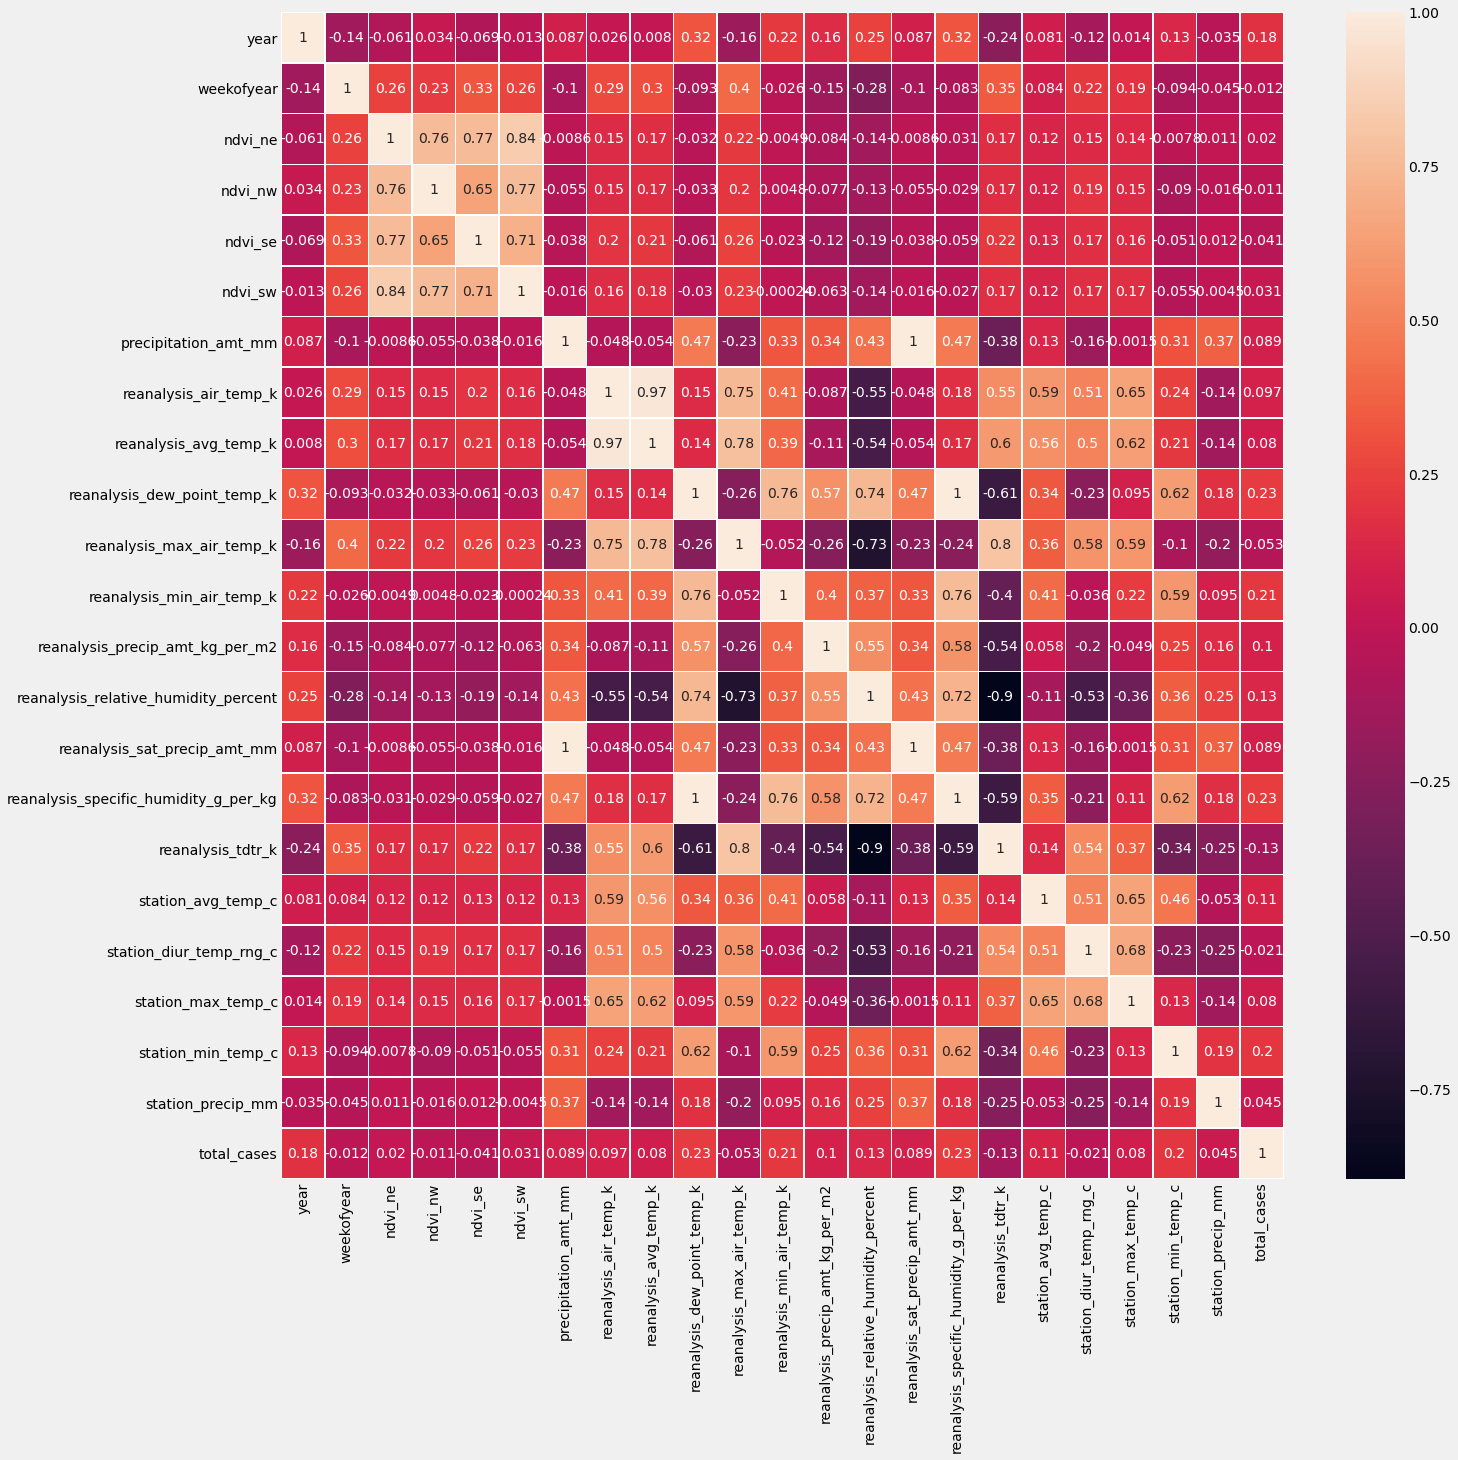

In [278]:
#Iquitos
data_corr2 = iq.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data_corr2,annot=True,linewidths=.6, ax=ax)

*   There is a correlation in NVDI for north east and south east in Iquitos.
*   Similarly withthe total number of cases at Iquitos there is no correlation.



In [279]:
# create mean NVDI for each week for each city
sj['nvdi_mean'] = sj[sj.columns[3:7]].mean(axis = 1)
iq['nvdi_mean'] = iq[iq.columns[3:7]].mean(axis = 1)

In [280]:
sj.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,ndvi_all_directions,ndvi_desc,nvdi_mean
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.150606,rock/sand,0.141603
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.157479,rock/sand,0.158144
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.133315,rock/sand,0.120806
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.209286,shrub/grassland,0.200419
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.239235,shrub/grassland,0.236533


Span of years.

In [281]:
sj['week_start_date'].min(),sj['week_start_date'].max()

(Timestamp('1990-04-30 00:00:00'), Timestamp('2008-04-22 00:00:00'))

Precipitation in amounts over the years

In [282]:
sj1 = sj.groupby('week_start_date')['precipitation_amt_mm'].sum().reset_index()
sj1 = sj1.set_index('week_start_date')
sj1.index

DatetimeIndex(['1990-04-30', '1990-05-07', '1990-05-14', '1990-05-21',
               '1990-05-28', '1990-06-04', '1990-06-11', '1990-06-18',
               '1990-06-25', '1990-07-02',
               ...
               '2008-02-19', '2008-02-26', '2008-03-04', '2008-03-11',
               '2008-03-18', '2008-03-25', '2008-04-01', '2008-04-08',
               '2008-04-15', '2008-04-22'],
              dtype='datetime64[ns]', name='week_start_date', length=936, freq=None)

In [283]:
d =sj1['precipitation_amt_mm'].resample('M').mean()
d['2006':]

week_start_date
2006-01-31    45.4900
2006-02-28     7.4875
2006-03-31    12.0200
2006-04-30    81.5060
2006-05-31    43.5525
2006-06-30    28.0900
2006-07-31    53.3720
2006-08-31    57.8525
2006-09-30    42.5200
2006-10-31    48.7620
2006-11-30    25.2050
2006-12-31    19.0800
2007-01-31    12.6820
2007-02-28     0.0000
2007-03-31    10.7100
2007-04-30    53.3000
2007-05-31    17.1325
2007-06-30    52.5175
2007-07-31    29.4100
2007-08-31    51.8050
2007-09-30    51.4750
2007-10-31    70.8700
2007-11-30    36.6425
2007-12-31    27.8150
2008-01-31    23.6920
2008-02-29     0.0000
2008-03-31     6.7975
2008-04-30     5.1950
Freq: M, Name: precipitation_amt_mm, dtype: float64

Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data. This is a very important technique in the field of analytics.
Most commonly used time series frequency are –
W : weekly frequency
M : month end frequency
SM : semi-month end frequency (15th and end of month)
Q : quarter end frequency

Visualize precipitation amounts in San Juan

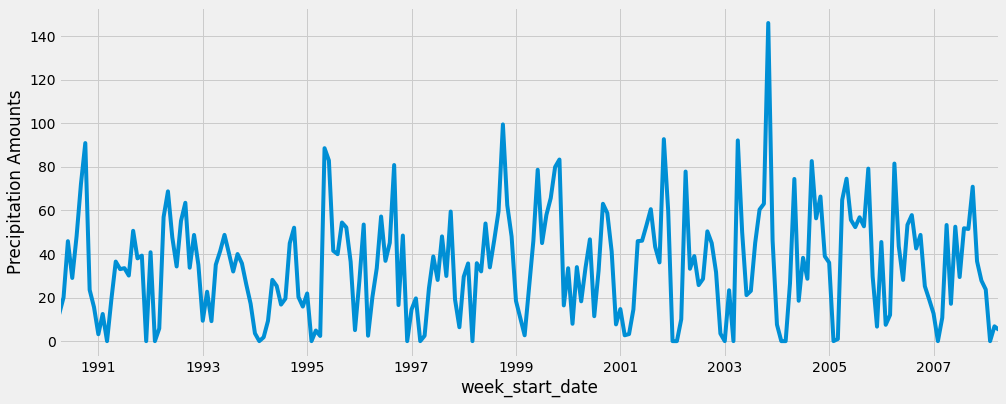

In [284]:
d.plot(figsize=(15, 6))
plt.ylabel("Precipitation Amounts")
plt.show()

Precipitation amounts have been constant over the years.

In [285]:
sj_new = sj.copy()
iq_new = iq.copy()

##### Climatic Conditions(Weather)

To visualize weather conditions we will need to standardize them to do away with the units.

In [286]:
from sklearn.preprocessing import StandardScaler

#Standardizing San Juan Features.
scaler = StandardScaler()
features = sj_new.columns[8:24]
scaled_sj = scaler.fit_transform(sj_new[features])
scaled_sj = pd.DataFrame(scaled_sj, columns = features, index=sj_new.index)
scaled_sj['weekofyear'] = sj_new['weekofyear']

#Standardizing Iquitos features.
features2 = iq_new.columns[8:24]
scaled_iq = scaler.fit_transform(iq_new[features])
scaled_iq = pd.DataFrame(scaled_iq, columns = features, index=iq_new.index)
scaled_iq['weekofyear'] = iq_new['weekofyear']
scaled_iq.head()

,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,weekofyear
936,-1.108024,-0.965058,-0.511702,-0.222531,0.097625,0.132999,-0.287564,0.495401,-1.108024,-0.312550,-0.106482,-1.218294,0.188781,-1.083150,-0.406188,-0.931223,26
937,-0.106517,-1.055384,-0.527794,-0.099187,-0.195572,-1.070817,-0.231451,0.648949,-0.106517,-0.165894,0.458286,-0.667693,0.696203,0.024569,-0.326603,-0.095081,27
938,-0.251337,-1.242140,-1.305601,0.087852,-1.075160,-0.167955,0.143368,0.948312,-0.251337,0.012472,-0.735296,-0.777813,0.632107,-0.713910,-0.406188,-0.373265,28
939,-1.671656,-2.146624,-2.179963,-1.911946,-1.452127,-2.575587,-0.671569,-0.189153,-1.671656,-1.852441,-0.030791,-1.915722,0.033884,-1.821628,-5.181264,-0.502025,29
940,-0.045345,-1.227492,-1.123219,-1.090998,-0.028031,-0.830054,-0.515012,-0.066729,-0.045345,-1.149878,0.126412,-0.998054,0.640653,-0.492367,-1.679541,-0.915327,30


Since weather conditions are best described during time of the year, We will plot our weather conditions against mweek of the year.

##### **San Juan Weather Conditions**

###### 1.Precipitation

Text(0.5, 0, 'Week of Year')

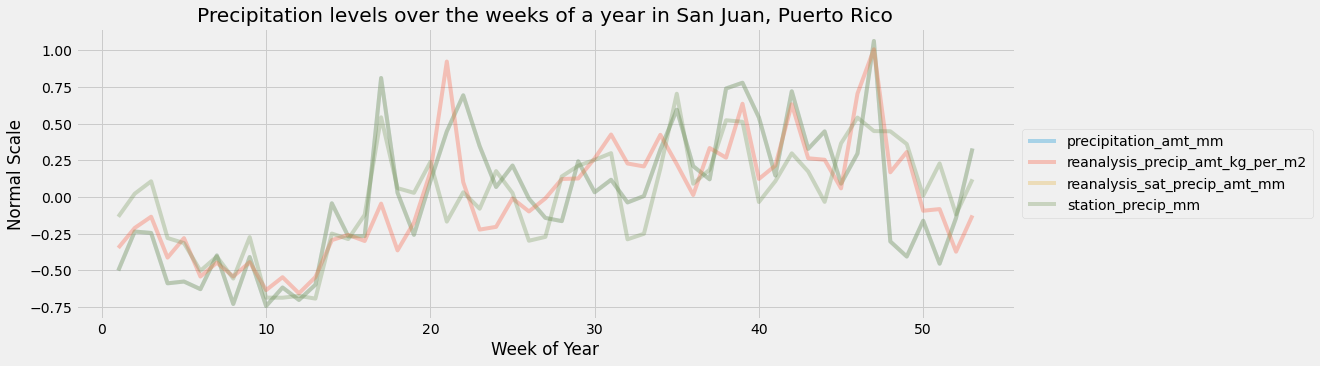

In [287]:
#selecting columns
precipitation_sj = scaled_sj.iloc[:,[0,6,8,15,16]]

plt.subplots(figsize=(15, 5))

for i in (precipitation_sj.columns[0:4]):
  precipitation_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Precipitation levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

###### 2.Temperatures in San Juan Throughout the year

Text(0.5, 0, 'Week of Year')

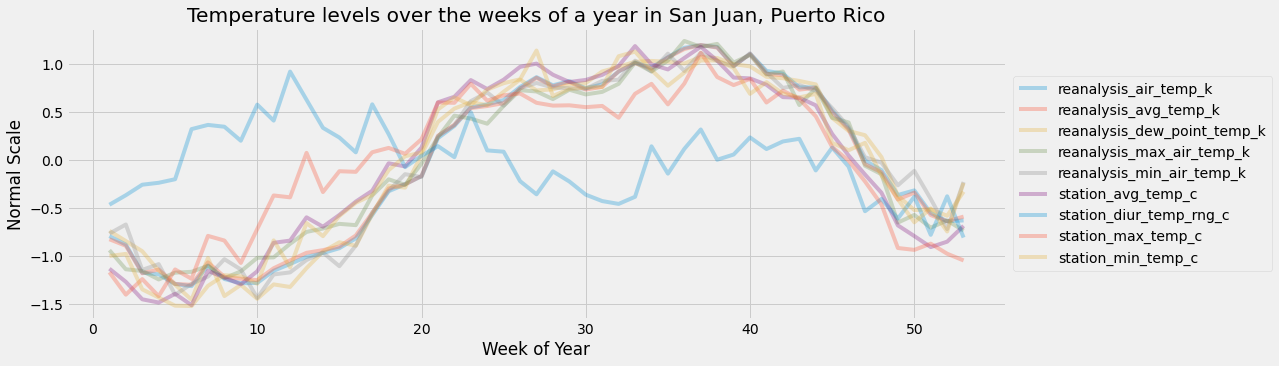

In [288]:
#selecting columns
temp_sj = scaled_sj.iloc[:,[1,2,3,4,5,11,12,13,14,16]]

plt.subplots(figsize=(15, 5))

for i in (temp_sj.columns[0:9]):
  temp_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temperature levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Temperatures are lower around the 25th week and rise from week 30 all the way to week 40.

###### 3.Humidity.

Text(0.5, 0, 'Week of Year')

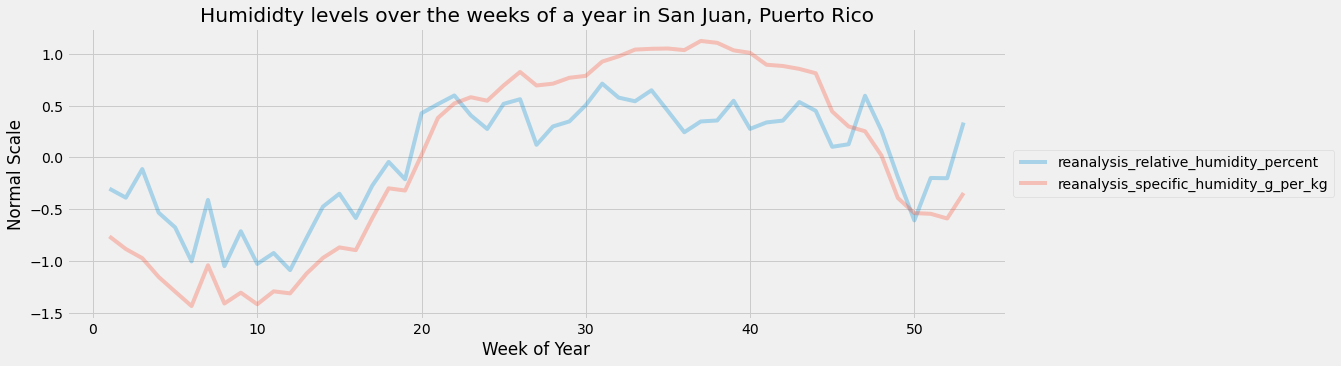

In [289]:
#selecting columns
humidity_sj = scaled_sj.iloc[:,[7,9,16]]

plt.subplots(figsize=(15, 5))

for i in (humidity_sj.columns[0:2]):
  humidity_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Humididty levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humidity is high from week 20 all the way to week 40.

###### 4.NVDI-Vegetation cover

Finding the mean of vegetation for each week in the four quadrants.(NE,NW,SE,SW)

Since the four features represent the different parts of the city(San Juan) we can as well get an average of vegetation cover per week.

In [290]:
# creating the  mean NVDI for each week for each city
sj_new['nvdi_mean'] = sj_new[sj_new.columns[4:8]].mean(axis = 1)
iq_new['nvdi_mean'] = iq_new[iq_new.columns[4:8]].mean(axis = 1)

Mean of NVDI over the weeks.

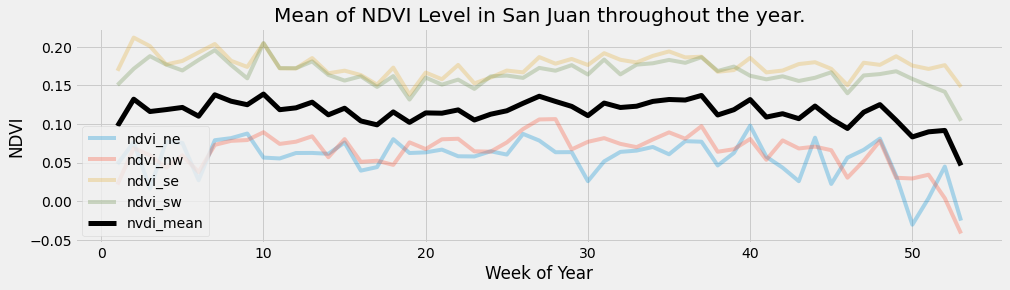

In [291]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in sj_new.columns[4:8]:
  sj_new.groupby('weekofyear')[name].mean().plot(alpha = .3)
sj_new.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in San Juan throughout the year.')
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


The NVDI scores in SW and SE are lower than the scores of NW and NE but then the average remains constant.There is a decresase around the last months of the years though.

**Mean of NVDI over the years In San Juan Purto Rico.**

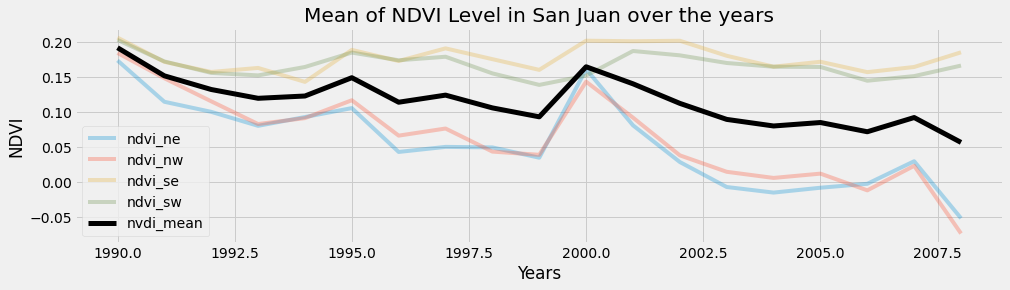

In [292]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in sj_new.columns[4:8]:
  sj_new.groupby('year')[name].mean().plot(alpha = .3)
sj_new.groupby('year')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in San Juan over the years')
plt.xlabel('Years')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


On average te number of dengue cases rise from week 25(June) till week 40(September) when it's at the peek then go down significantly over the weeks and is lowest between week 10(March) and week 20(May).

#### Iquitos Weather Conditions.

In [293]:
scaled_iq.columns

Index(['precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'weekofyear'],
      dtype='object')

###### 1.Precipitation.

Text(0.5, 0, 'Week of Year')

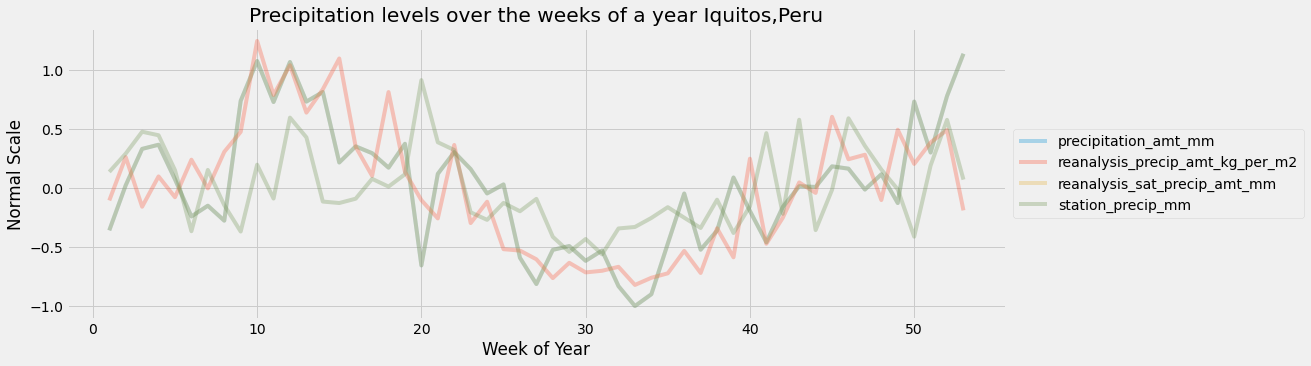

In [294]:
#selecting columns
precipitation_iq = scaled_iq.iloc[:,[0,6,8,15,16]]

plt.subplots(figsize=(15, 5))

for i in (precipitation_iq.columns[0:4]):
  precipitation_iq.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Precipitation levels over the weeks of a year Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humidity is a measure of the amount of water vapour being held in the air. Water vapour is a gas. Precipitation is when the gas turns to liquid or solid and forms rain, snow, hail, mist, fog, frost, dew etc

###### 2.Temperatures in Iquitos,Peru throughout the year.

Text(0.5, 0, 'Week of Year')

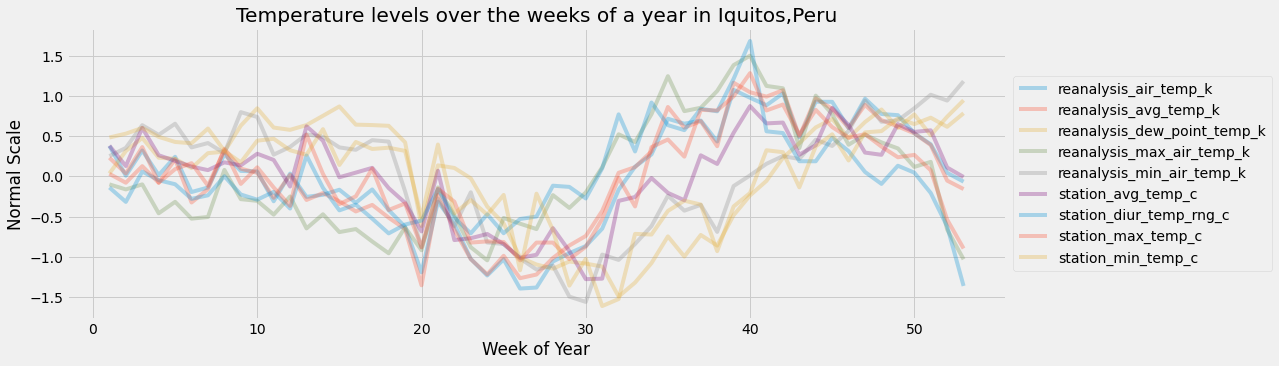

In [295]:
#selecting columns
temp_iq = scaled_iq.iloc[:,[1,2,3,4,5,11,12,13,14,16]]

plt.subplots(figsize=(15, 5))

for i in (temp_iq.columns[0:9]):
  temp_iq.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temperature levels over the weeks of a year in Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

In Iquitos, Temeratures are lower at week 20 to week 30 then there is a rise at week 30 until week 40.

###### 3.Humidity Levels in Iquitos,Peru.

Text(0.5, 0, 'Week of Year')

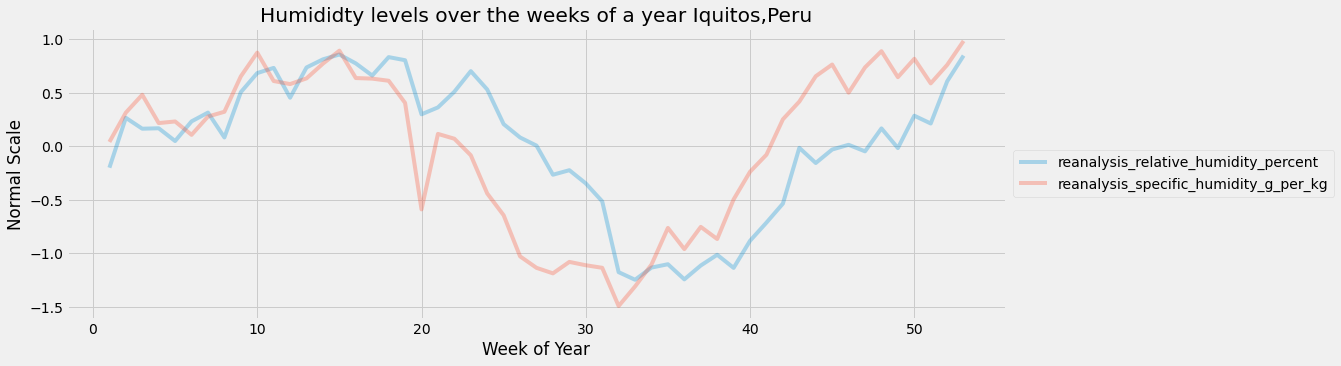

In [296]:
#selecting columns
humidity_iq = scaled_iq.iloc[:,[7,9,16]]

plt.subplots(figsize=(15, 5))

for i in (humidity_iq.columns[0:2]):
  humidity_iq.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Humididty levels over the weeks of a year Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humididty levela go low as temperature gets rising at week 30 there about.

###### 4.NVDI-Vegetation cover - Iquitos,Peru.


Mean of NVDI over the weeks in Iquitos,Peru.


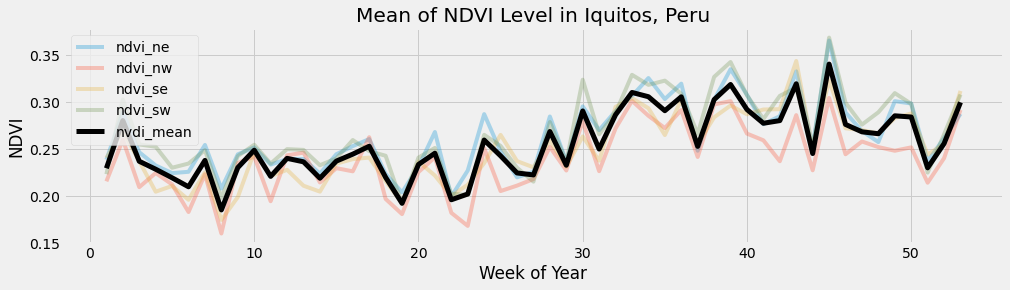

In [297]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in iq_new.columns[4:8]:
  iq_new.groupby('weekofyear')[name].mean().plot(alpha = .3)
iq_new.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in Iquitos, Peru')
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


Iquitos show a consistent NVDI score throughout though there is an rise around week 25 to 45 there about.

Mean of NVDI over the years in Iquitos,Peru.

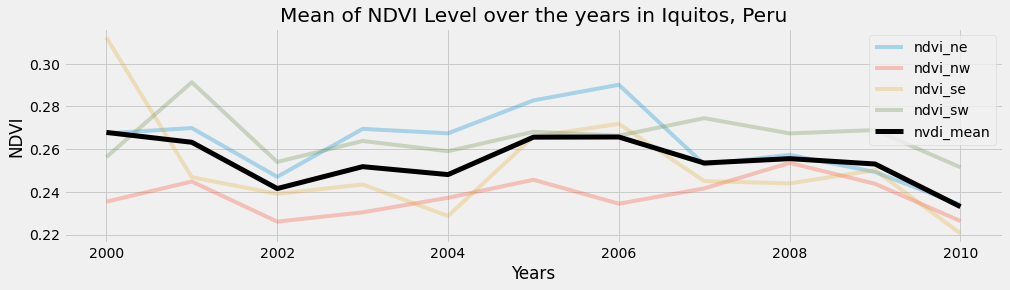

In [298]:
# plot week by week average vegetation for Iquitos.
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in iq_new.columns[4:8]:
  iq_new.groupby('year')[name].mean().plot(alpha = .3)
iq_new.groupby('year')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level over the years in Iquitos, Peru')
plt.xlabel('Years')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.


###### Distribution of Total Cases Over the years.

Text(0.5, 1.0, 'Distribution of Total Dengue cases over the years in Iquitos')

<Figure size 432x288 with 0 Axes>

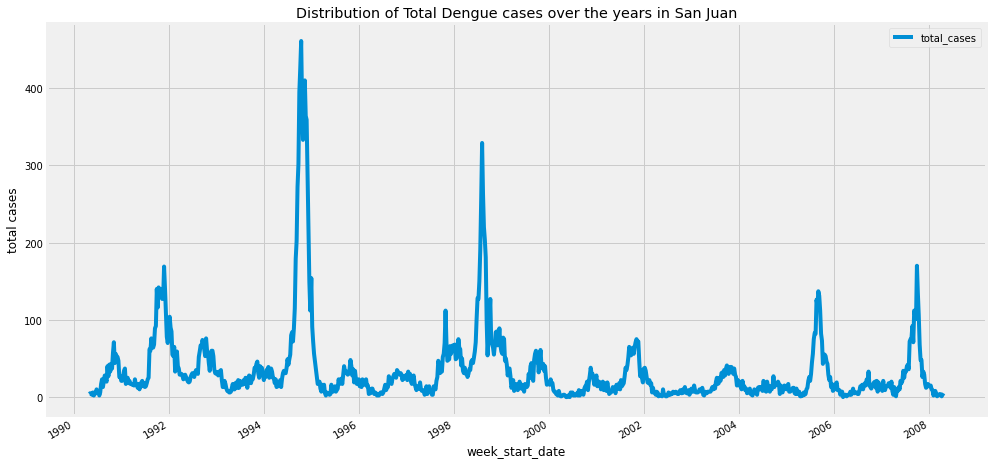

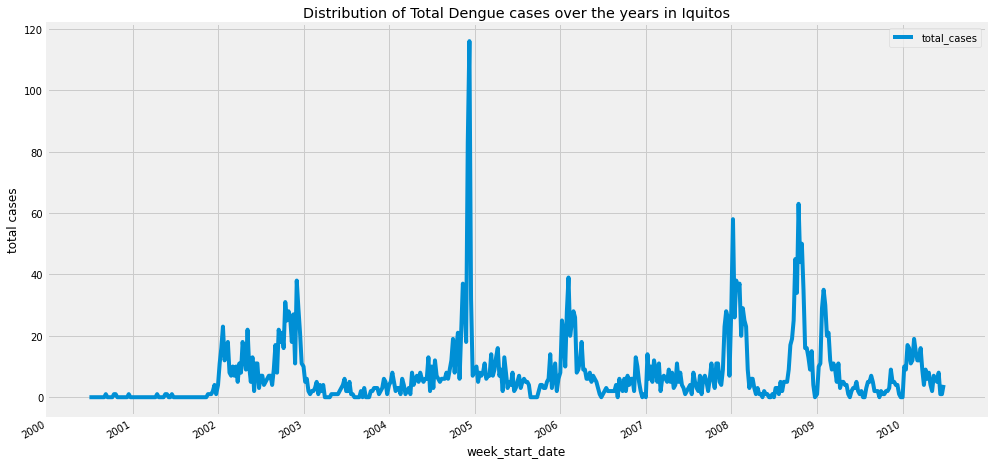

In [299]:
%matplotlib inline

plt.figure()
ax = sj[['week_start_date', 'total_cases']].plot('week_start_date', figsize=(15,8))
ax1 = iq[['week_start_date', 'total_cases']].plot('week_start_date', figsize=(15,8))
ax.set_ylabel('total cases')
ax1.set_ylabel('total cases')#Iquitos

ax.set_title('Distribution of Total Dengue cases over the years in San Juan')
ax1.set_title('Distribution of Total Dengue cases over the years in Iquitos')

**San Juan**

From June 1994 to May 1995, a very high number of dengue cases was recorded in San Juan, Puerto Rico. This epidemic produced the largest number of hospitalizations.

Also at the onset of 1999 there was relatively high reports of cases of people that were infected with Dengue.


**Iquitos.**

There was a high recording of dengue cases in Iquitos at the end of 2004 approaching 2005 and later rose between 2008 and 2009.[link text](https://www.researchgate.net/figure/Dengue-epidemics-overlaid-to-illustrate-shifting-of-peak-incidence-The-epidemics-are_fig10_264009350)

We could refer to this outliers as outbreaks.


###### Total Cases over the weeks.
1. San Juan, Puerto Rico.

Text(0.5, 0, 'Week of Year')

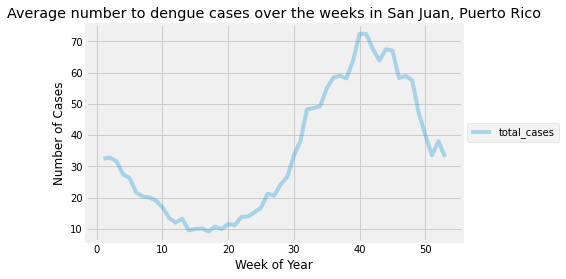

In [300]:
df = scaled_sj.copy()
df['total_cases'] = sj['total_cases']

#selecting columns
df1 = df[['total_cases','weekofyear']]

df1.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average number to dengue cases over the weeks in San Juan, Puerto Rico')
plt.ylabel('Number of Cases')
plt.xlabel('Week of Year')

2. Iquitos

Text(0.5, 0, 'Week of Year')

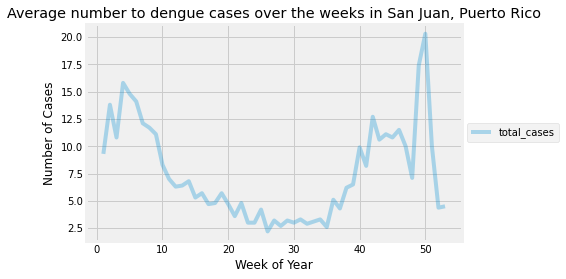

In [301]:
df11 = scaled_iq.copy()
df11['total_cases'] = iq['total_cases']

#selecting columns
df111 = df11[['total_cases','weekofyear']]

df111.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average number to dengue cases over the weeks in San Juan, Puerto Rico')
plt.ylabel('Number of Cases')
plt.xlabel('Week of Year')

In Iquitos, dengue cases are rise from week 35 and is highest at week 50(December) then drops for a span of two weeks and rises again in January.
Cases are low in the middle of the year.

Findings;
*   List item
*   List item



#### Trends of Climatic Conditions and Total Number of Cases

San Juan

In [302]:
sj_new.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,ndvi_all_directions,ndvi_desc,nvdi_mean
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.150606,rock/sand,0.150606
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.157479,rock/sand,0.157479
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.133315,rock/sand,0.133315
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.209286,shrub/grassland,0.209286
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.239235,shrub/grassland,0.239235


In [303]:
#temp_sj = scaled_sj.iloc[:,[1,2,3,4,5,11,12,13,14,16]]
#temp_sj['Total_cases'] = sj['total_cases']
#temp_sj['year'] = sj['year']

#temp_sj.head()

#plt.figure(figsize=(16, 7))
#sns.pointplot(x="weekofyear", y="Total_cases", hue="year", data=temp_sj, x_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
 #      'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xlabel("month")
#plt.ylabel("Total_cases")
#plt.title("Total Cases segmented on years")
#plt.legend(loc='upper right')

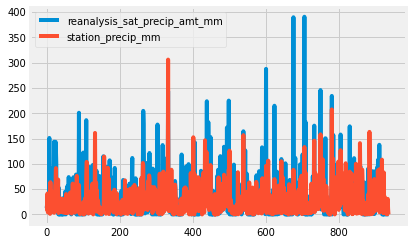

In [304]:
#compare both precipitation columns
sj[['reanalysis_sat_precip_amt_mm','station_precip_mm']].plot()

Reanalysis datasets are created by assimilating ("inputting") climate observations using the same climate model throughout the entire reanalysis period in order to reduce the affects of modeling changes on climate statistics.

In this case reanalysis precipitation is higher than station precipitation(actual recorded data)

### **Decomposing Data** 
This enables us to see trends, seasonality and noise in the data.

In [305]:
sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,ndvi_all_directions,ndvi_desc,nvdi_mean
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.150606,rock/sand,0.141603
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.157479,rock/sand,0.158144
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.133315,rock/sand,0.120806
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.209286,shrub/grassland,0.200419
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.239235,shrub/grassland,0.236533


In [306]:
from pylab import rcParams

dec = sj[['week_start_date','total_cases']]
dec.set_index('week_start_date',inplace=True)
dec.head()

,total_cases
week_start_date,
1990-04-30,4
1990-05-07,5
1990-05-14,4
1990-05-21,3
1990-05-28,6


No handles with labels found to put in legend.


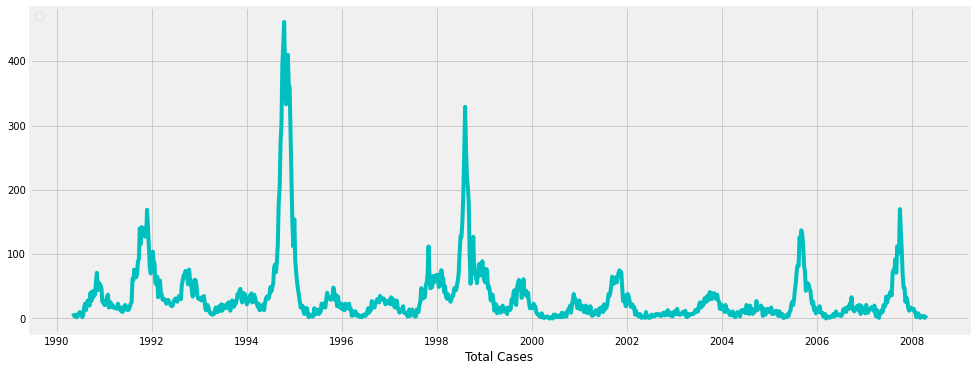

In [307]:
plt.figure(figsize=(15,6))
plt.plot(dec.index, dec, color='c', label=None)
plt.xlabel('Years')
plt.xlabel('Total Cases')
plt.legend(loc=2)
plt.show()

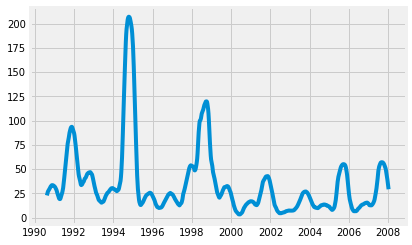

In [308]:
#Decomposing to three components 
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

#Use an additive model
result = seasonal_decompose(dec, model='additive',freq=30)

plt.plot(result.trend)

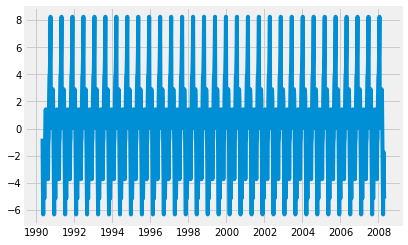

In [309]:
plt.plot(result.seasonal)

the seasonal one repeats at regular intervals of time.

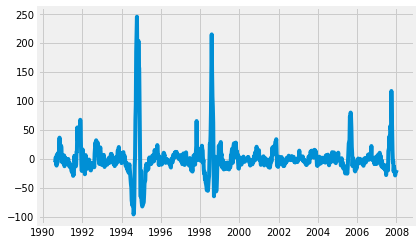

In [310]:
plt.plot(result.resid)

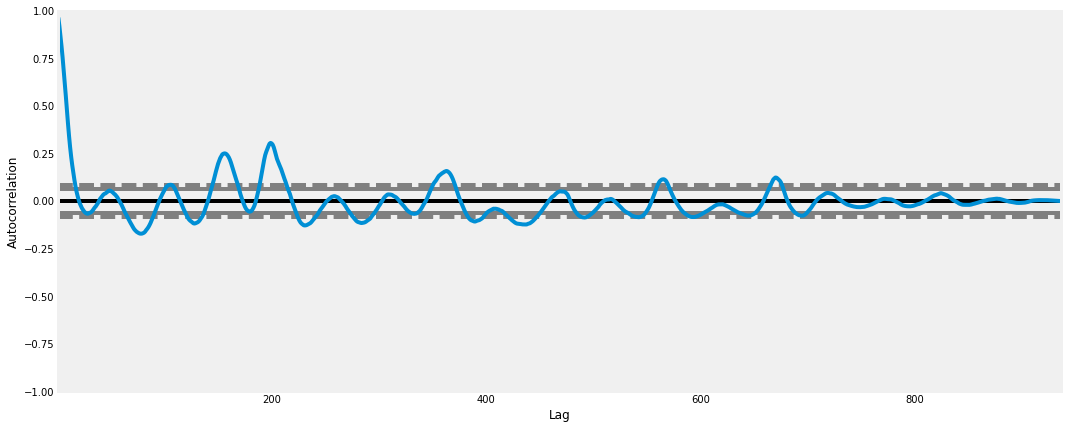

In [311]:
import pandas.plotting
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
autocorrelation_plot(sj["total_cases"])

An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other.

### FEATURE SELECTION.

Text(0.5, 1.0, 'Correlation with total_cases in "sj"')

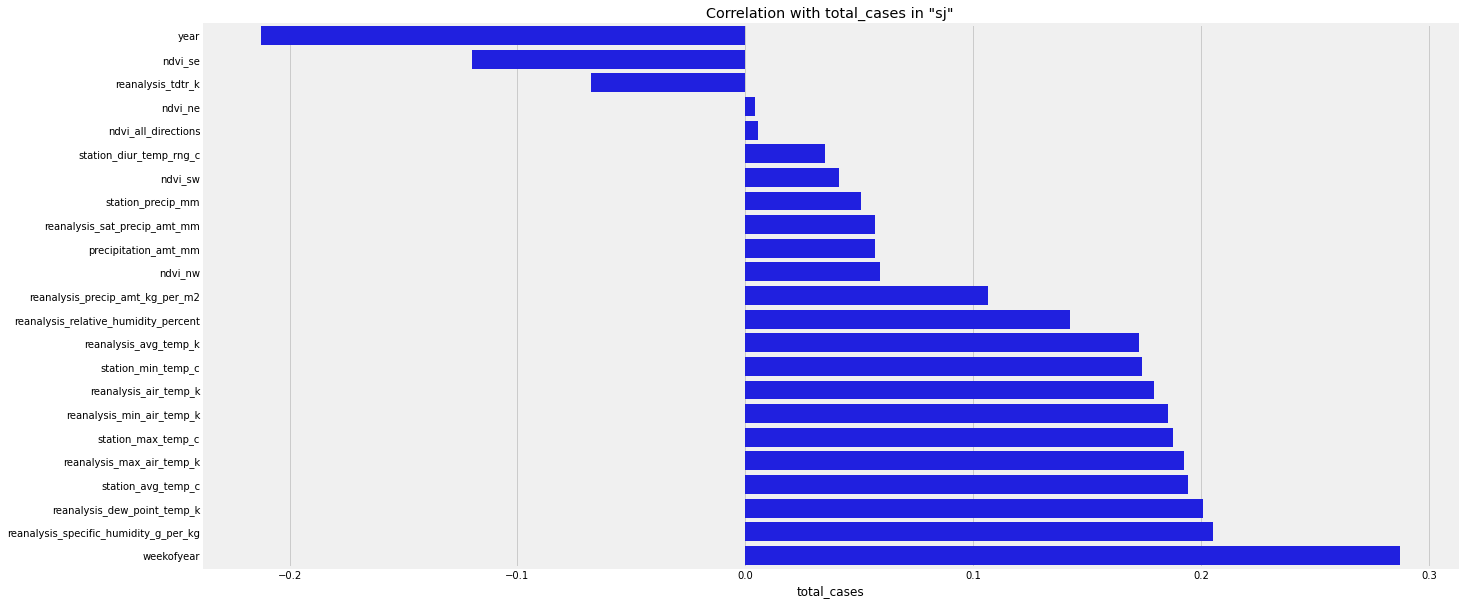

In [312]:
sorted_features = data_corr.sort_values(by='total_cases', axis=0).drop('total_cases')
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=sorted_features.total_cases, y=sorted_features.index, color="b")
ax.set_title('Correlation with total_cases in "sj"')